In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
Colocations handled automatically by placer.


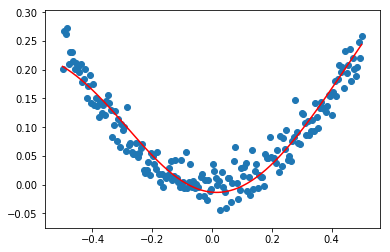

In [5]:
#sample data
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise


x = tf.placeholder(tf.float32,(None,1))
y = tf.placeholder(tf.float32,(None,1))

weight_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
wx_plus_b_L1 = tf.matmul(x,weight_L1) + biases_L1

L1 = tf.nn.tanh(wx_plus_b_L1)

weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
wx_plus_b_L2 = tf.matmul(L1,weight_L2) + biases_L2

prediction = tf.nn.tanh(wx_plus_b_L2)

loss = tf.reduce_mean(tf.square(y-prediction))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-')
    plt.show()


In [7]:
x_data = np.linspace(-0.5,0.5,10)[:,np.newaxis]
x_data

array([[-0.5       ],
       [-0.38888889],
       [-0.27777778],
       [-0.16666667],
       [-0.05555556],
       [ 0.05555556],
       [ 0.16666667],
       [ 0.27777778],
       [ 0.38888889],
       [ 0.5       ]])